In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
gen=ImageDataGenerator(rotation_range=30, width_shift_range=0.3, shear_range=0.3, rescale=1./255)

In [3]:
data_path = 'data/flower_photos/'
batch_siz = 2313

data_gen = gen.flow_from_directory(directory=data_path, batch_size=batch_siz, shuffle=True, target_size=(300, 300), class_mode='categorical')

Found 2313 images belonging to 5 classes.


In [4]:
img, label = data_gen.next()

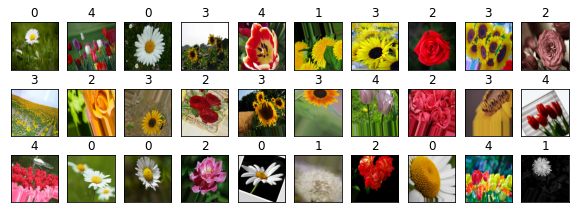

In [5]:
plt.figure(figsize=(10, 12))
for i in range(30):
    plt.subplot(10, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(str(np.argmax(label[i])))
    plt.imshow(img[i])

In [6]:
result = []
for i in range(2313):
    result.append(np.argmax(label[i]))
result = np.array(result).reshape(-1, 1)
result.shape

(2313, 1)

In [7]:
x_train, x_test, t_train, t_test = train_test_split(img, result,test_size=0.3,
shuffle=False, random_state=1004)

In [8]:
x_train = x_train.astype(np.float32)/255
x_test = x_test.astype(np.float32)/255

In [9]:
# augment_ratio = 1.5 # 전체 데이터의 150%
# augment_size = int(augment_ratio * x_train.shape[0])

# print(augment_size)

# # 전체 x_train 개수의 150% 비율
# randidx = np.random.randint(x_train.shape[0], size=augment_size)

# # 임의로 선택된 데이터는 원본 데이터를 참조하기 때문에
# # 원본 데이터에 영향을 줄수 있음. 그래서 copy() 함수를 통해 안전하게 복사본 만듬
# x_augmented = x_train[randidx].copy()
# t_augmented = t_train[randidx].copy()
# print(x_augmented.shape, t_augmented.shape)

# # 이미지 보강 실행
# x_augmented, t_augmented = gen.flow(x_augmented, t_augmented,
#                                     batch_size=augment_size,
#                                     shuffle=False).next()
# print(x_augmented.shape, t_augmented.shape)

In [10]:
# # x_train, t_train 에 보강된 데이터 추가
# x_train = np.concatenate((x_train, x_augmented))
# t_train = np.concatenate((t_train, t_augmented))

# print(x_train.shape, t_train.shape)

In [11]:
cnn = Sequential()
cnn.add(Conv2D(input_shape=(300, 300, 3), kernel_size=(3, 3), padding='same', filters=32, activation='relu')) # cnn.add(Conv2D(32,(3,3), activation='relu', padding='same', input_shape=(32, 32, 3)))
cnn.add(Conv2D(kernel_size=(3, 3), filters=32, padding='same', activation='relu')) # cnn.add(Conv2D(32,(3,3), activation='relu', padding='same'))
cnn.add(MaxPool2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(kernel_size=(3, 3), filters=64, padding='same', activation='relu'))
cnn.add(Conv2D(kernel_size=(3, 3), filters=64, padding='same', activation='relu'))
cnn.add(MaxPool2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))

# cnn.add(Conv2D(kernel_size=(3, 3), filters=128, padding='same', activation='relu'))
# cnn.add(Conv2D(kernel_size=(3, 3), filters=128, padding='same', activation='relu'))
# cnn.add(MaxPool2D(pool_size=(2, 2)))
# cnn.add(Dropout(0.25))

# cnn.add(Conv2D(kernel_size=(3, 3), filters=256, padding='same', activation='relu'))
# cnn.add(MaxPool2D(pool_size=(2, 2)))
# cnn.add(Dropout(0.25))

cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 300, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 300, 300, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 150, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 150, 150, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 150, 150, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 150, 150, 64)      36928     
                                                        

In [ ]:
from datetime import datetime

start_time = datetime.now()

cnn.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 손실함수가 5 epochs을 진행을 검사하여 더이상 줄어들지 않으면 종료
# EarlyStopping(모니터링 값, 대기 epochs)
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# 학습 중인 모델을 자동 저장
model_checkpoint = ModelCheckpoint(filepath='bast.h5',
                                   monitor='val_loss',
                                   verbose=1,
                                   save_best_only=True)

hist = cnn.fit(x_train, t_train, batch_size=256, epochs=50, validation_data=(x_test, t_test), callbacks=[early_stopping, model_checkpoint])

end_time = datetime.now()
print(end_time-start_time)

Epoch 1/50
